**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---

### **Introducción al Aprendizaje Automático**
### Regresión

---

# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [3]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [4]:
X_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [7]:
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

### Respuestas
1. Es un conjunto de datos de un censo realizado en California en el año 1990 sobre viviendas, utilizando una fila por **block group**. Un block group es la menor unidad geográfica con la cual el censo de USA publica datos (valores tipicos de entre 600 a 3000 personas). [Ver](https://en.wikipedia.org/wiki/Census_block_group)

2. La variable objetivo a predecir es el valor medio de la vivienda en los distritos de California expresada en cientos de miles de dolares ($100.000).
   
3. Los atributos disponibles son:
    - MedInc: ingresos medio en el block group
    - HouseAge: edad media de las viviendas
    - AveRooms: promedio de habitacion por vivienda
    - AveBedrms: promedio de dormitorios por vivienda
    - Population: poblacion del block group
    - AveOccup: promedio de los ocupantes por vivienda
    - Latitude: latitude del block group
    - Longitude: longitud del block group
      
4. Los atributos que seran los más determinatos son: AveRooms, AveBedrms y Population. Con los dos primeros determinas el tamaño de la vivienda y con el tercero la cantidad de personas que se encuentran dentro de un mismo bloque, es decir, se puede saber si es una zona muy poblada o no.

5. La variable objetivo puede estar sesgada por desigualdadadas socioecomicoas, ya que toma la media los ingresos por vivienda. A su vez, las areas con menores ingresos pueden ser subestimadas para determinar el valor de una vivienda. También al ser valores tomados por la media, estos pueden no se representativos en el caso de tener valores extremos muy alejados.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

### Respuestas

#### 1. Gráfico

Se grafican las ocho variables comparadas cada una a la variable objetivo MedHouseVal

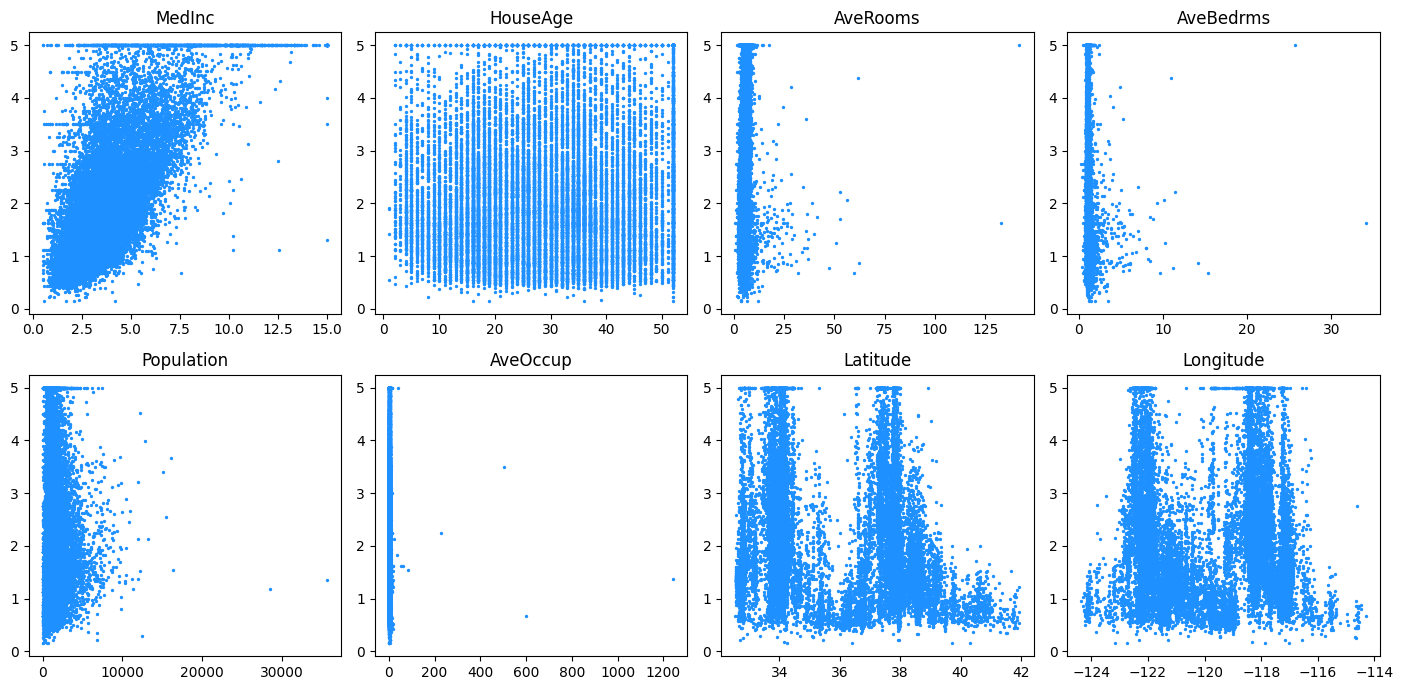

In [8]:
fig, ax = plt.subplots(2, 4, figsize=(14, 7))

ax = ax.flatten()

for i, feature in enumerate(california['feature_names']):
    ax[i].scatter(X[:, i], y, s=2, color='dodgerblue')
    ax[i].set_title(feature)

plt.tight_layout()
plt.show()

Se pueden ver outliers en todas las variables. Se ve como en MedInc se recortan los valores de la variable objetivo a 5, presentando un valor maximo en 5, es decir, $500.000.

#### 2. Atributos para la predicción

El atributo que más puede servir para la predicción es **MedInc**, ya que presenta un comportamiento positivo con la variable objetivo y se puede obser con claridad una linea de tendencia del mismo. Aunque se ve que se genera una linea horizontal en el borde superior, indicando que los valores se truncaron de alguna manera

#### 3. Lista de atributos


1. MedInc
2. Population
3. AveRooms
4. AveBedrms
5. AveOccup
6. HouseAge
7. Latitude
8. Longitude

Ahora se puede determinar de forma correcta como se relacionan cada variable con la variable objetivo, obteniendo la correlacion de todas las variables

<Axes: >

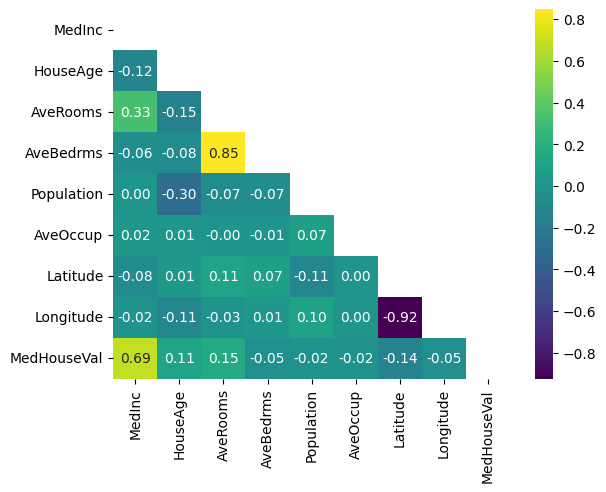

In [9]:
df_california = pd.concat([X_california, y_california], axis=1)
corr = df_california.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2f', cmap='viridis')

Las variables con mayor correlacion son: MedInc, AveRooms y HouseAge.

Para poder tener menos sesgos a la hora de entrenar los modelos, se filtran los datos. Se toman los porcentinles 5% y 95% para eliminar outliers

In [10]:
quantiles = df_california.quantile([0.05, 0.95])

In [11]:
filtered_data = df_california[(df_california >= quantiles.loc[0.05]) & (df_california <= quantiles.loc[0.95])].dropna()

In [12]:
X_filtered = filtered_data.drop('MedHouseVal', axis=1).values
y_filtered = filtered_data['MedHouseVal'].values

Se vuelven a separar los datos pero ya filtrados

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

### Respuestas

#### 1. Selección del atributo

Se selecciona el atributo MedInc, ya que la grafica muestra un mejor comportamiento y es la que tiene mayor correlación

In [14]:
feature = 'MedInc'

Todos los arreglos deben tener la misma forma para entrenar los modelos, en este caso n filas x 1 columna

In [15]:
selector = (np.array(california['feature_names']) == feature)

X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train_f.shape, X_test_f.shape, y_train.shape, y_test.shape

((8243, 1), (2061, 1), (8243, 1), (2061, 1))

#### 2. Instanciación y entrenado del modelo

Como se vio en trabajos anteriores, es mejor estandarizar los valores revios a entrenar el modelo. `make_pipeline` permite aplicar transformacion en secuencia a los datos.  

In [16]:
std = StandardScaler()
lr = LinearRegression()
model = make_pipeline(std, lr)
model.fit(X_train_f, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### 3. Predicción del modelo

In [17]:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

#### 4. Gráfico

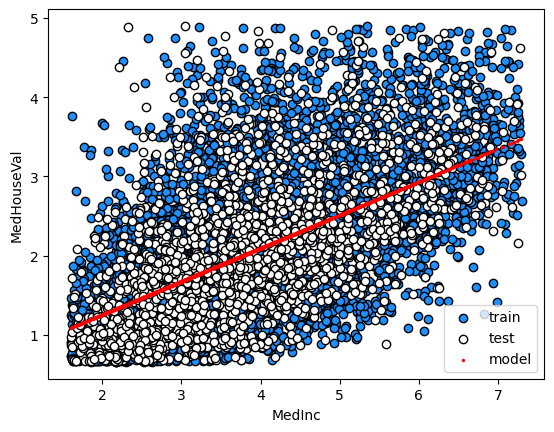

error cuadrático medio de Train: 0.5055
error cuadrático medio de Test:	 0.5162


In [18]:
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.scatter(X_test_f, y_test_pred, color="red", label="model", s=2)
plt.ylabel('MedHouseVal')
plt.xlabel(feature)
plt.legend()
plt.show()

print(f'error cuadrático medio de Train: {train_error:.4f}')
print(f'error cuadrático medio de Test:\t {test_error:.4f}')

#### 5. Resultado


Se puede observar una relación entre MedInc (promedio de los ingresos por grupo) y el MedHouseVal (valor promedio de las casas en California). El modelo presenta un error del 50%, mostranto que no es optimo para este caso

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

#### 1. Modelo

Se crea una lista con el numero de grado para iterar

In [19]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:
    # Train
    std = StandardScaler()
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(std, pf, lr)
    model.fit(X_train_f, y_train)

    # Predict
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)

    # Evaluate
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

#### 2. Gráfico Error vs. Grados

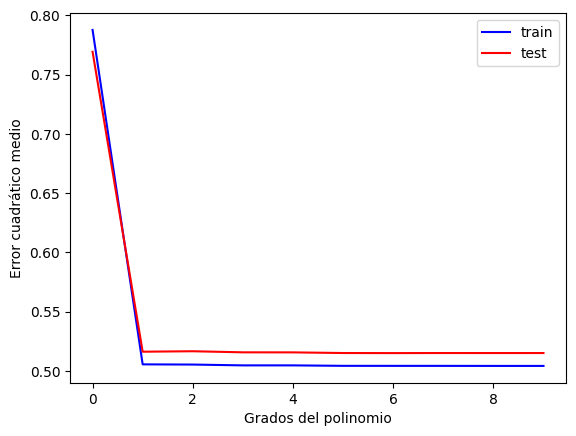

In [20]:
plt.plot(degrees, train_errors, color='blue', label='train')
plt.plot(degrees, test_errors, color='red', label='test')
plt.xlabel('Grados del polinomio')
plt.ylabel('Error cuadrático medio')
plt.legend()
plt.show()

Se puede ver que a partir del grado 1, el error se mantiene casi constante, sin generar sobre ajuste hasta el grado 9

In [21]:
for degree in degrees:
    print(f'[{degree}] error cuadrático medio de Train:\t{train_errors[degree]:.4f}')
    print(f'[{degree}] error cuadrático medio de Test:\t{test_errors[degree]:.4f}')
    print(f'[{degree}] diferencia:\t\t\t\t{np.abs(train_errors[degree]-test_errors[degree]):.4f}\n')

[0] error cuadrático medio de Train:	0.7876
[0] error cuadrático medio de Test:	0.7692
[0] diferencia:				0.0185

[1] error cuadrático medio de Train:	0.5055
[1] error cuadrático medio de Test:	0.5162
[1] diferencia:				0.0107

[2] error cuadrático medio de Train:	0.5054
[2] error cuadrático medio de Test:	0.5166
[2] diferencia:				0.0112

[3] error cuadrático medio de Train:	0.5047
[3] error cuadrático medio de Test:	0.5157
[3] diferencia:				0.0110

[4] error cuadrático medio de Train:	0.5047
[4] error cuadrático medio de Test:	0.5156
[4] diferencia:				0.0110

[5] error cuadrático medio de Train:	0.5043
[5] error cuadrático medio de Test:	0.5151
[5] diferencia:				0.0108

[6] error cuadrático medio de Train:	0.5043
[6] error cuadrático medio de Test:	0.5150
[6] diferencia:				0.0108

[7] error cuadrático medio de Train:	0.5043
[7] error cuadrático medio de Test:	0.5151
[7] diferencia:				0.0108

[8] error cuadrático medio de Train:	0.5042
[8] error cuadrático medio de Test:	0.5151
[

#### 3. Ajuste del grado

Se selecciona el grado que menor error tenga

In [22]:
# Train
degree = 5
std = StandardScaler()
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(std, pf, lr)
model.fit(X_train_f, y_train)
model.fit(X_train_f, y_train)

# Predict
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

# Evaluate
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

#### 4. Gráfico del modelo

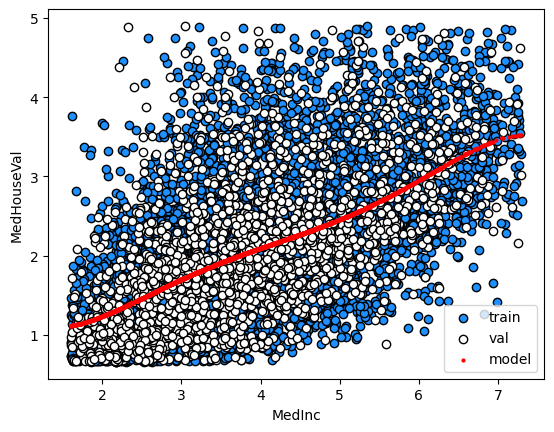

error cuadrático medio de Train: 0.5043
error cuadrático medio de Test:	 0.5151


In [23]:
plt.scatter(X_train_f, y_train, color="dodgerblue", edgecolor='k', label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="val")
plt.scatter(X_test_f, y_test_pred, color="red", label="model", s=4)
plt.legend()
plt.xlabel(feature)
plt.ylabel('MedHouseVal')
plt.show()

print(f'error cuadrático medio de Train: {train_error:.4f}')
print(f'error cuadrático medio de Test:\t {test_error:.4f}')

#### 5. Resultado



Se puede observar que el modelo se ajusta mejor a la preccion pero aun conserva un error alto

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

#### 1. Atributos

Se seleccionan los dos atributos con mayor correlacion con la variable objetivo

In [24]:
selector = (np.array(california['feature_names']) == 'MedInc') | (np.array(california['feature_names']) == 'AveRooms')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((8243, 2), (2061, 2))

#### 2. Modelo

In [25]:
# 2. Resolver acá.

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:
    # Train
    std = StandardScaler()
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(std, pf, lr)
    model.fit(X_train_fs, y_train)

    # Predict
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)

    # Evaluate
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

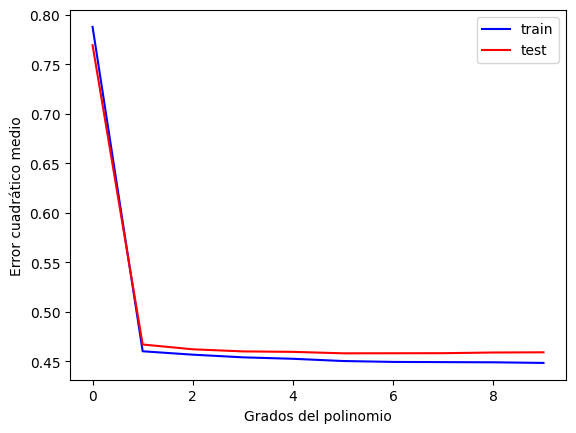

In [26]:
plt.plot(degrees, train_errors, color='blue', label='train')
plt.plot(degrees, test_errors, color='red', label='test')
plt.xlabel('Grados del polinomio')
plt.ylabel('Error cuadrático medio')
plt.legend()
plt.show()

In [27]:
for degree in degrees:
    print(f'[{degree}] error cuadrático medio de Train:\t{train_errors[degree]:.4f}')
    print(f'[{degree}] error cuadrático medio de Test:\t{test_errors[degree]:.4f}')
    print(f'[{degree}] diferencia:\t\t\t\t{np.abs(train_errors[degree]-test_errors[degree]):.4f}\n')

[0] error cuadrático medio de Train:	0.7876
[0] error cuadrático medio de Test:	0.7692
[0] diferencia:				0.0185

[1] error cuadrático medio de Train:	0.4603
[1] error cuadrático medio de Test:	0.4671
[1] diferencia:				0.0068

[2] error cuadrático medio de Train:	0.4568
[2] error cuadrático medio de Test:	0.4623
[2] diferencia:				0.0054

[3] error cuadrático medio de Train:	0.4542
[3] error cuadrático medio de Test:	0.4602
[3] diferencia:				0.0060

[4] error cuadrático medio de Train:	0.4527
[4] error cuadrático medio de Test:	0.4597
[4] diferencia:				0.0070

[5] error cuadrático medio de Train:	0.4504
[5] error cuadrático medio de Test:	0.4582
[5] diferencia:				0.0078

[6] error cuadrático medio de Train:	0.4495
[6] error cuadrático medio de Test:	0.4583
[6] diferencia:				0.0087

[7] error cuadrático medio de Train:	0.4493
[7] error cuadrático medio de Test:	0.4583
[7] diferencia:				0.0090

[8] error cuadrático medio de Train:	0.4491
[8] error cuadrático medio de Test:	0.4590
[

Se selecciona el grado


In [28]:
degree = 4

# Train
std = StandardScaler()
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(std, pf, lr)
model.fit(X_train_fs, y_train)

# Predict
y_train_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)

# Evaluate
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

#### Gráfico en 3D

#### 3. Resultado

Al tener dos variables más la variable objetivo, se puede generar un gráfico en 3D. Primero se crea una grilla para el modelo

In [29]:
x_start = min(np.min(X_train_fs[:, 0]), np.min(X_test_fs[:, 0]))
x_end = max(np.max(X_train_fs[:, 0]), np.max(X_test_fs[:, 0]))
y_start = min(np.min(X_train_fs[:, 1]), np.min(X_test_fs[:, 1]))
y_end = max(np.max(X_train_fs[:, 1]), np.max(X_test_fs[:, 1]))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
y = np.linspace(y_start, y_end, 200).reshape(-1, 1)

x = np.linspace(x_start, x_end, 200)
y = np.linspace(y_start, y_end, 200)
X_mesh, Y_mesh = np.meshgrid(x, y)

Z = model.predict(np.c_[X_mesh.ravel(), Y_mesh.ravel()])
Z = Z.reshape(X_mesh.shape)

Con la grilla creada se pueden generar un grafico en 3D estático, ajustando la vista

In [30]:
elevacion = 45
azimuth = 45
roll = 0

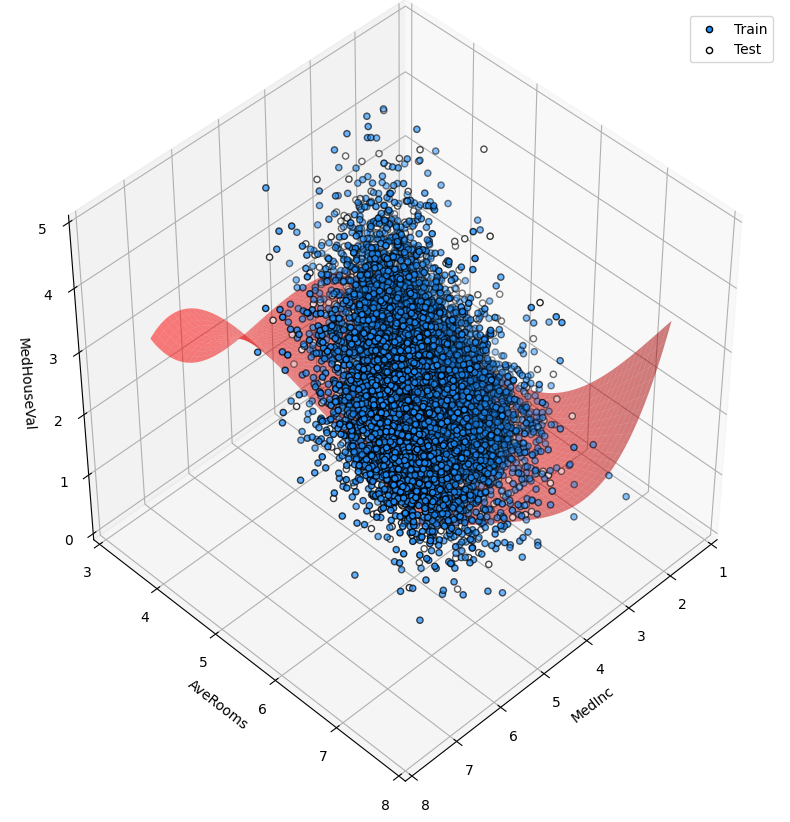

In [31]:
fig_1 = plt.figure(figsize=(10, 10))
ax = fig_1.add_subplot(111, projection='3d')

ax.scatter(X_train_fs[:, 0], X_train_fs[:, 1], y_train, facecolor="dodgerblue", edgecolor="k", label="Train")
ax.scatter(X_test_fs[:, 0], X_test_fs[:, 1], y_test, facecolor="white", edgecolor="k", label="Test")
ax.plot_surface(X_mesh, Y_mesh, Z, color='red', alpha=0.5)

ax.view_init(elev=elevacion, azim=azimuth, roll=roll)

ax.set_xlim(1, 8)
ax.set_ylim(3, 8)
ax.set_zlim(0, 5)

ax.set_box_aspect([1,1,1])

ax.set_xlabel('MedInc')
ax.set_ylabel('AveRooms')
ax.set_zlabel('MedHouseVal')
ax.legend()
plt.show()

Mediante `Plotly` se puede crear un gráfico interactivo

In [32]:
fig_2= go.Figure()

fig_2.add_trace(go.Scatter3d(
    x=X_train_fs[:, 0], y=X_train_fs[:, 1], z=y_train.flatten(),
    mode='markers',
    marker=dict(size=3, color='dodgerblue', line=dict(width=1, color='black')),
    name='Train'
))

fig_2.add_trace(go.Scatter3d(
    x=X_test_fs[:, 0], y=X_test_fs[:, 1], z=y_test.flatten(),
    mode='markers',
    marker=dict(size=3, color='white', line=dict(width=1, color='black')),
    name='Test'
))

fig_2.add_trace(go.Surface(
    x=X_mesh, y=Y_mesh, z=Z,
    colorscale='reds',
    opacity=0.8,
    showscale=False,
    name='Model'
))

fig_2.update_layout(
    scene=dict(xaxis=dict(title='MedInc'),
               yaxis=dict(title='AveRooms'),
               zaxis=dict(title='MedHouseVal')
))

fig_2.show()

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


### 7. Regularización

`Ridge` corrige overfitting

In [33]:
alpha = 10

ridge_regression = Ridge(alpha = alpha)
ridge_regression.fit(X_train, y_train)

y_train_pred = ridge_regression.predict(X_train)
y_test_pred = ridge_regression.predict(X_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'error cuadrático medio de Train: {train_error:.4f}')
print(f'error cuadrático medio de Test:\t {test_error:.4f}')

error cuadrático medio de Train: 0.3031
error cuadrático medio de Test:	 0.2920


Como se puede observar, ridge mejora significativamente los errores